# Universidad Central de Venezuela
## Facultad de Ciencias
### Escuela de Computación

**Minería de datos**
*Período  1-2024*

## Quiz 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import gaussian_kde

# Lee el archivo CSV
df = pd.read_csv('historical_data.csv')

# Muestra las primeras 10  filas del DataFrame en modo tabla
print("Primeras filas del DataFrame:")
display(df.head(10))

#Evalua cuantos registros tiene el dataset en un inicio
num_registros = df.shape[0]
print(f"El dataset tiene {num_registros} registros inicialmente")

#All money (dollar) values given in the data are in cents and all time duration values given are in seconds


Primeras filas del DataFrame:


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


El dataset tiene 197428 registros inicialmente


Pregunta 1: ¿Cúal es el ‘store_id‘ con la mayor cantidad de dinero en ventas?

Objetivo: Encontrar la tienda con mayor cantidad de dinero en ventas.Pasos a seguir :

1. Agrupar los datos por store\_id.
2. Calcular la suma total de los subtotales para cada tienda.
3. Identificar la tienda con la suma más alta como la que tiene la mayor cantidad de dinero en ventas.


In [2]:
# Paso 1 y 2- Agrupa los datos por 'store_id' y calcula la suma de subtotales
ventas_por_tienda = df.groupby('store_id')['subtotal'].sum()

# Paso 3 - Encuentra la tienda con la mayor cantidad de ventas
tienda_max_ventas = ventas_por_tienda.idxmax()

print(f"La tienda con el 'store_id' {tienda_max_ventas} tiene la mayor cantidad de ventas.")

La tienda con el 'store_id' 6074 tiene la mayor cantidad de ventas.


Observaciones: La tienda con mayor cantidad de ventas en dinero es al 6074

Pregunta  2: ¿Cuántas tiendas diferentes venden pizza?

Para responder a la pregunta "¿Cuántas tiendas diferentes venden pizza?" utilizando el dataset proporcionado, puedes seguir estos pasos:


1. Filtrar tiendas que venden pizza: Identificar las tiendas que tienen "pizza" como una de las categorías primarias de tienda (\texttt{store\_primary\_category}).
2.  Eliminar duplicados: Contar cada tienda una sola vez, incluso si aparece en múltiples filas del dataset.
3. Contar el número de tiendas únicas.

Inciso: Adicionalmente es deseable evaluar los restaurantes que venden comida italiana, ya que dependiendo de la logica dle negocio, podria ser prudente tomar en cuenta a los mismos, pues la pizza es una comida italiana.



In [3]:
# Filtra las tiendas que venden pizza (ignorando los valores NaN)
tiendas_pizza = df[df['store_primary_category'].str.contains('pizza', na=False)]

# Cuenta las tiendas únicas
num_tiendas_pizza = tiendas_pizza['store_id'].nunique()

print(f"Hay {num_tiendas_pizza} tiendas diferentes que venden pizza.")

Hay 1088 tiendas diferentes que venden pizza.


In [4]:
# Filtra las tiendas que venden pizza (ignorando los valores NaN)
tiendas_pizza = df[df['store_primary_category'].str.contains('pizza', na=False)]

# Filtra las tiendas que venden comida italiana (ignorando los valores NaN)
tiendas_italiana = df[df['store_primary_category'].str.contains('italian', na=False)]

# Cuenta las tiendas únicas que venden pizza, comida italiana, ambas y una u otra
num_tiendas_pizza = tiendas_pizza['store_id'].nunique()
num_tiendas_italiana = tiendas_italiana['store_id'].nunique()

# Imprime los resultados
print(f"Hay {num_tiendas_pizza} tiendas diferentes que venden pizza.")
print(f"Hay {num_tiendas_italiana} tiendas diferentes que venden comida italiana.")



Hay 1088 tiendas diferentes que venden pizza.
Hay 612 tiendas diferentes que venden comida italiana.


Observaciones: Hay 1088 tiendas diferentes que venden pizza. Hay 612 restaurantes de comida italiana, que puede que vendan pizzas, de cumplirse  esto para todos, hay entonces mas restaurantes que venden pizza, para obtener el numero exacto es necesario interpretar los datos con un mayor conocimiento de la logica del negocio y de la creacion de los datos.

Observaciones: Hay 1088 tiendas diferentes que venden pizza. Hay 612 restaurantes de comida italiana, de ellos 612- (1546- 1088)=154 puede que vendan pizzas, de cumplir esto para todos, hay entonces 1546 restaurantes que venden pizza.

La interpretacion de estos resultados dependera de la logica del negocio y de la creacion de los datos.

Pregunta 3: ¿Existe una asociación entre la cantidad de elementos distintos en la compra y la variable estimated_store_to_consumer_driving_duration?

Objetivo:En esta sección, investigaremos si la cantidad de elementos distintos en una compra está relacionada con la variable estimated_store_to_consumer_driving_duration. Para ello, utilizaremos el coeficiente de Pearson y gráficos visuales para una inspección más detallada.

In [5]:



# Crea un DataFrame secundario para el análisis específico
df_secundario_p3 = df[['num_distinct_items', 'estimated_store_to_consumer_driving_duration']].copy()

# Identificar y eliminar registros con NaN o Inf en las columnas seleccionadas
df_secundario_p3 = df_secundario_p3.replace([np.inf, -np.inf], np.nan)  # Convertir Infinitos a NaN
df_secundario_p3 = df_secundario_p3.dropna()  # Eliminar filas con NaN

# Verificar si hay otros tipos de valores no deseados y limpiarlos si es necesario
# Por ejemplo, si hay valores no numéricos que no sean NaN o Inf y no se esperan en estas columnas

# Cálculo del coeficiente de correlación de Pearson
correlation = df_secundario_p3['num_distinct_items'].corr(df_secundario_p3['estimated_store_to_consumer_driving_duration'])

# Convertir la correlación a porcentaje
correlation_percentage = correlation * 100

print(f"Coeficiente de correlación de Pearson (en porcentaje): {correlation_percentage:.2f}%")



Coeficiente de correlación de Pearson (en porcentaje): 2.27%


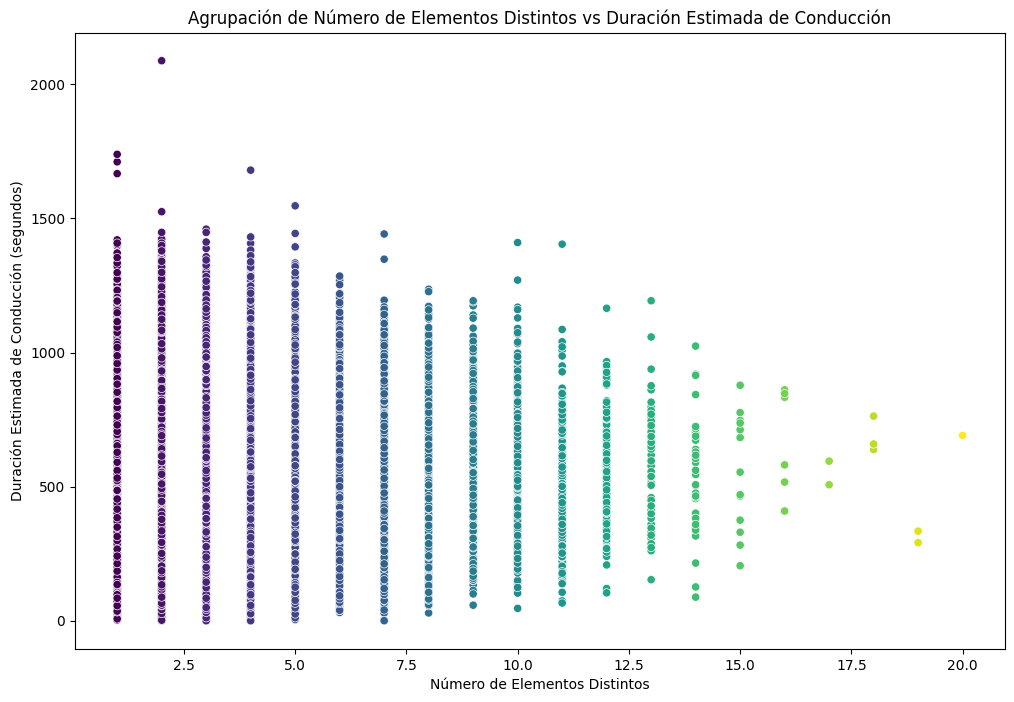

In [6]:
# Crear un gráfico de dispersión con agrupación
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_secundario_p3, x='num_distinct_items', y='estimated_store_to_consumer_driving_duration', hue='num_distinct_items', palette='viridis', legend=False)
plt.title('Agrupación de Número de Elementos Distintos vs Duración Estimada de Conducción')
plt.xlabel('Número de Elementos Distintos')
plt.ylabel('Duración Estimada de Conducción (segundos)')
plt.show()


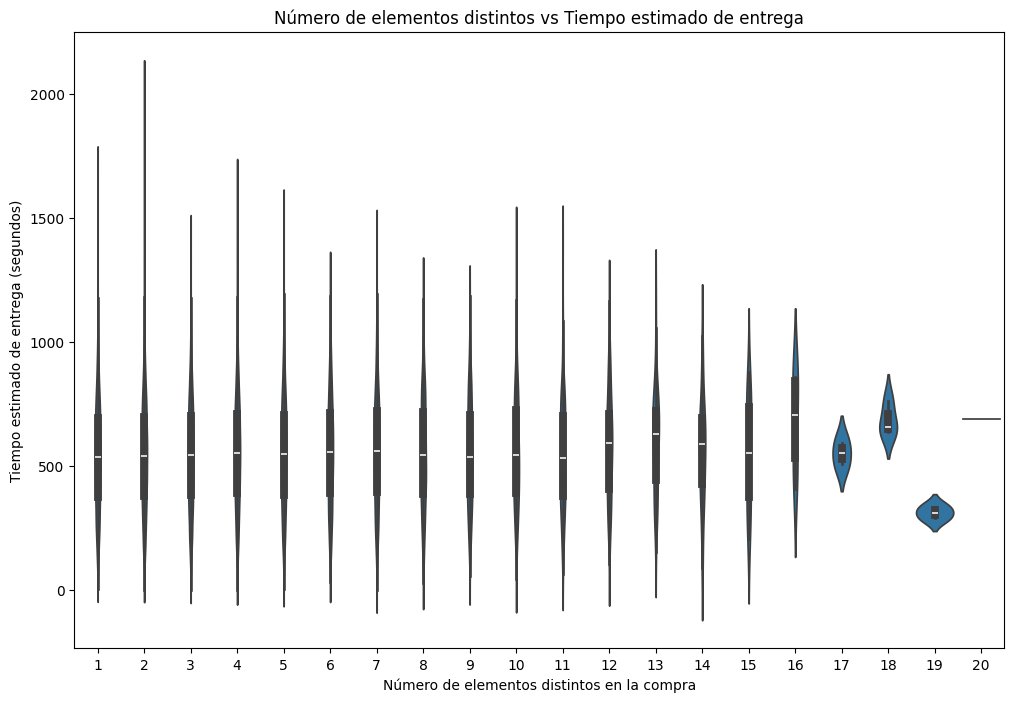

In [7]:
# Configurar el tamaño y los subplots
f, ax = plt.subplots(1, 1, figsize=(12, 8))

# Crear el gráfico de densidad (violin plot)
sns.violinplot(x="num_distinct_items", y="estimated_store_to_consumer_driving_duration", data=df_secundario_p3, ax=ax)
ax.set_title('Número de elementos distintos vs Tiempo estimado de entrega')
ax.set_xlabel('Número de elementos distintos en la compra')
ax.set_ylabel('Tiempo estimado de entrega (segundos)')

# Mostrar el gráfico
plt.show()

Observaciones:En el grafico de dispersion no se observa una relación clara y directa entre el número de elementos distintos y la duración estimada de conducción. Para que haya una correlacion las ocurrencias deberian de aparecer lo mas lineal posible, lo cual no ocurre, de hecho , ocurre todo lo contrario, las ocurrencias estan dispersas, para un numero de elementos diferentes hay ocurrencias en casi todos los tiempos de despacho posibles.

La densidad más alta de duración de conducción está entre 500 y 1000 segundos( 8 y 17 min aproximadamente), independientemente del número de elementos distintos, aunque parece que la mayor variabilidad en la duración se encuentra en los pedidos con un menor número de elementos distintos, esto podemos apreciarlo de mejor manera en el grafico de densidad .

En general en la inspeccion visual no se considera haya una relación directa entre la cantidad de elementos distintos en la compra y la variable (\texttt{estimated\_store\_to\_consumer\_driving\_duration}).

Adicionalmente, se calculo el coheficiente de peterson que resulta ser un metodo mas formal de definir la existenia o no de una asociacion entre ambas variables y se obtuvo un resultado de un 2,27% .Un coeficiente de correlación de Pearson de 2.2% indica una correlación muy débil entre el número de elementos distintos en la compra y el tiempo estimado de entrega. Esto sugiere que no hay una relación significativa entre estas dos variables en el conjunto de datos analizado.

En conclusion, basado principalmente en el coeficiente de correlación de Pearson de 2.2%, no se puede afirmar que haya una asociación significativa entre más elementos distintos en la compra y el tiempo estimado de entrega del establecimiento al consumidor. La correlación es muy débil, lo que indica que no hay una relación lineal evidente.



Pregunta 4: ¿Qué tipo de comida tarda menos en ser preparada (desde creación de orden hasta delivery)?

Para responder a esta pregunta, utilizaremos el dataset proporcionado y seguiremos estos pasos:

1. Calcular la duración total del proceso desde la creación de la orden hasta la entrega (delivery) para cada pedido.
2. Agrupar los datos por tipo de comida (\texttt{food\_type}).
3.  Calcular el tiempo promedio de preparación y entrega para cada tipo de comida.
4.  Identificar el tipo de comida con el menor tiempo promedio de preparación y entrega.



In [8]:
# Paso 1: Calcular la duración total del proceso desde la creación de la orden hasta la entrega (en minutos)
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['total_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Paso 2: Agrupar los datos por tipo de comida
grouped = df.groupby('store_primary_category')

# Paso 3: Calcular el tiempo promedio de preparación y entrega para cada tipo de comida
average_durations = grouped['total_duration'].mean().reset_index()

# Paso 4: Identificar el tipo de comida con el menor tiempo promedio de preparación y entrega
min_duration_food_type = average_durations.loc[average_durations['total_duration'].idxmin()]

# Resultado
print("El tipo de comida que tarda menos en ser preparada y entregada es:", min_duration_food_type['store_primary_category'])
print("Con un tiempo promedio de:", min_duration_food_type['total_duration'], "minutos")


El tipo de comida que tarda menos en ser preparada y entregada es: chocolate
Con un tiempo promedio de: 34.13333333333333 minutos


Observaciones: tomando en cuenta el tiempo promedio de entrega, la comida que tarda menos en ser preparada es el chocolate

Pregunta 5:Usando la ubicación con menos órdenes, ¿cuál es el mejor momento para ordenar entre las 5 pm y las 10 pm?

Para responder a esta pregunta, utilizaremos el dataset proporcionado y seguiremos estos pasos:

1. Calcular el número total de órdenes para cada ubicación (market_id)
2. Identificar la ubicación (market_id) con el menor número total de órdenes.
3. Filtrar las órdenes de la ubicación identificada que se realizaron entre las 5 pm y las 10 pm.
4. Calcular la duración del despacho (desde la emisión hasta la entrega).
5. Calcular la distribución de órdenes por hora en ese rango de tiempo (Extra, indicador organziacional)
6. Calcular el tiempo promedio de despacho por hora en ese rango de tiempo.
7. Identificar la hora con la menor cantidad de órdenes como una posible mejor hora para ordenar. (Extra, indicador organziacional)
8. Identificar la hora con el menor tiempo promedio de despacho como otra posible mejor hora para ordenar.



C:\Users\joine\AppData\Local\Temp\ipykernel_23452\1435329872.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_distribution.index = pd.to_datetime(hourly_distribution.index.astype(str) + ':00').strftime('%I %p')
C:\Users\joine\AppData\Local\Temp\ipykernel_23452\1435329872.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  avg_delivery_duration_per_hour.index = pd.to_datetime(avg_delivery_duration_per_hour.index.astype(str) + ':00').strftime('%I %p')


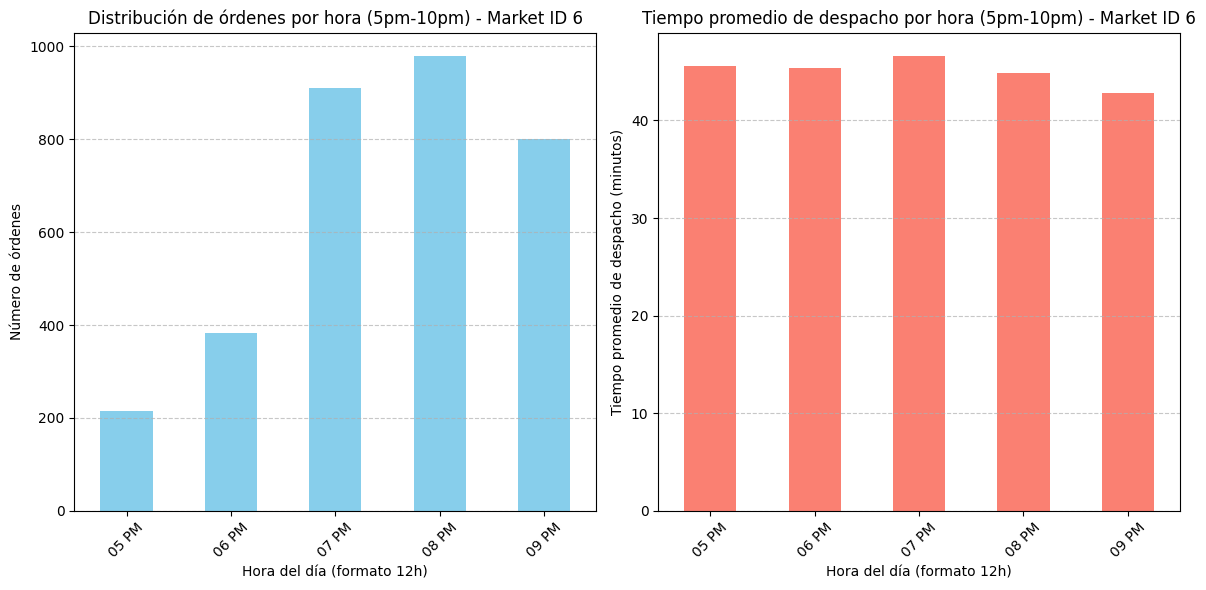

El market_id con menos órdenes es el 6
El mejor momento para ordenar entre las 5 pm y las 10 pm basado en la menor cantidad de órdenes es a las  05 PM
El mejor momento para ordenar entre las 5 pm y las 10 pm basado en el menor tiempo promedio de despacho es a las  09 PM


In [9]:
# Paso 1: Calcular el número total de órdenes para cada market_id (ciudad/región)
order_counts = df['market_id'].value_counts()

# Paso 2: Identificar el market_id con el menor número total de órdenes
min_orders_market_id = order_counts.idxmin()

# Convertir el market_id a entero (por si acaso)
min_orders_market_id = int(min_orders_market_id)

# Paso 3: Filtrar las órdenes del market_id identificado
filtered_df = df[df['market_id'] == min_orders_market_id].copy()

# Paso 4: Convertir 'created_at' y 'actual_delivery_time' a datetime
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])
filtered_df['actual_delivery_time'] = pd.to_datetime(filtered_df['actual_delivery_time'])

# Calcular la duración del despacho (en minutos)
filtered_df['delivery_duration'] = (filtered_df['actual_delivery_time'] - filtered_df['created_at']).dt.total_seconds() / 60

# Filtrar las órdenes entre las 17:00 y las 22:00 (formato de 24 horas)
filtered_df.set_index('created_at', inplace=True)
orders_between_5pm_10pm = filtered_df.between_time('17:00:00', '22:00:00').copy()

# Paso 5: Calcular la distribución de órdenes por hora en ese rango de tiempo
hourly_distribution = orders_between_5pm_10pm.index.hour.value_counts().sort_index()

# Paso 6: Calcular el tiempo promedio de despacho por hora en ese rango de tiempo
orders_between_5pm_10pm['hour'] = orders_between_5pm_10pm.index.hour
avg_delivery_duration_per_hour = orders_between_5pm_10pm.groupby('hour')['delivery_duration'].mean()

# Paso 7: Identificar la hora con la menor cantidad de órdenes
best_hour_to_order_orders = hourly_distribution.idxmin()

# Paso 8: Identificar la hora con el menor tiempo promedio de despacho
best_hour_to_order_time = avg_delivery_duration_per_hour.idxmin()

# Convertir las horas al formato de 12 horas (el solicitado)
best_hour_to_order_orders_12h = pd.to_datetime(str(best_hour_to_order_orders) + ':00').strftime('%I %p')
best_hour_to_order_time_12h = pd.to_datetime(str(best_hour_to_order_time) + ':00').strftime('%I %p')
hourly_distribution.index = pd.to_datetime(hourly_distribution.index.astype(str) + ':00').strftime('%I %p')
avg_delivery_duration_per_hour.index = pd.to_datetime(avg_delivery_duration_per_hour.index.astype(str) + ':00').strftime('%I %p')

# Visualización: Gráfico de barras de la distribución de órdenes por hora
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
hourly_distribution.plot(kind='bar', color='skyblue')
plt.title(f'Distribución de órdenes por hora (5pm-10pm) - Market ID {min_orders_market_id}')
plt.xlabel('Hora del día (formato 12h)')
plt.ylabel('Número de órdenes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Visualización: Gráfico de barras del tiempo promedio de despacho por hora
plt.subplot(1, 2, 2)
avg_delivery_duration_per_hour.plot(kind='bar', color='salmon')
plt.title(f'Tiempo promedio de despacho por hora (5pm-10pm) - Market ID {min_orders_market_id}')
plt.xlabel('Hora del día (formato 12h)')
plt.ylabel('Tiempo promedio de despacho (minutos)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Resultados
print("El market_id con menos órdenes es el", min_orders_market_id)
print("El mejor momento para ordenar entre las 5 pm y las 10 pm basado en la menor cantidad de órdenes es a las ", best_hour_to_order_orders_12h)
print("El mejor momento para ordenar entre las 5 pm y las 10 pm basado en el menor tiempo promedio de despacho es a las ", best_hour_to_order_time_12h)


Observaciones:

El mercado (market_id) número 6 tiene la menor cantidad de órdenes entre las ciudades/regiones analizadas, sugiriendo una menor actividad o demanda relativa. El análisis reveló que el mejor momento para realizar órdenes esperando lo menos posible en este market_id entre las 5 pm y las 10 pm es a las 9:00 PM, esto basado en el tiempo promedio de entrega. Adicionalmente (como medida adicional),se considero prudente desde el punto de vista de la organizacion hacer un analisis del patron de cantidad de ordenes en ese rango horario, podemos observar que la distribución de órdenes muestra que las horas de la tarde-noche presentan fluctuaciones significativas en la demanda de servicios de entrega esto podria afectar la planificación operativa y estratégica, esto a pesar de que la fluctuacion entiempo promedio de entrega es baja. Este analisis proporciona una visión clave sobre la actividad de órdenes y patrones horarios dentro del mercado específico analizado (el de menor ventas) y ademas nos ofrecio insights que no solo le indican al cliente cual es la mejor hora para ordenar sino que permite a la organicazcion ajustar estrategias y mejorar la eficiencia operativa. 